In [2]:
import tensorflow as tf

In [3]:
mnist=tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
import numpy as np

In [31]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

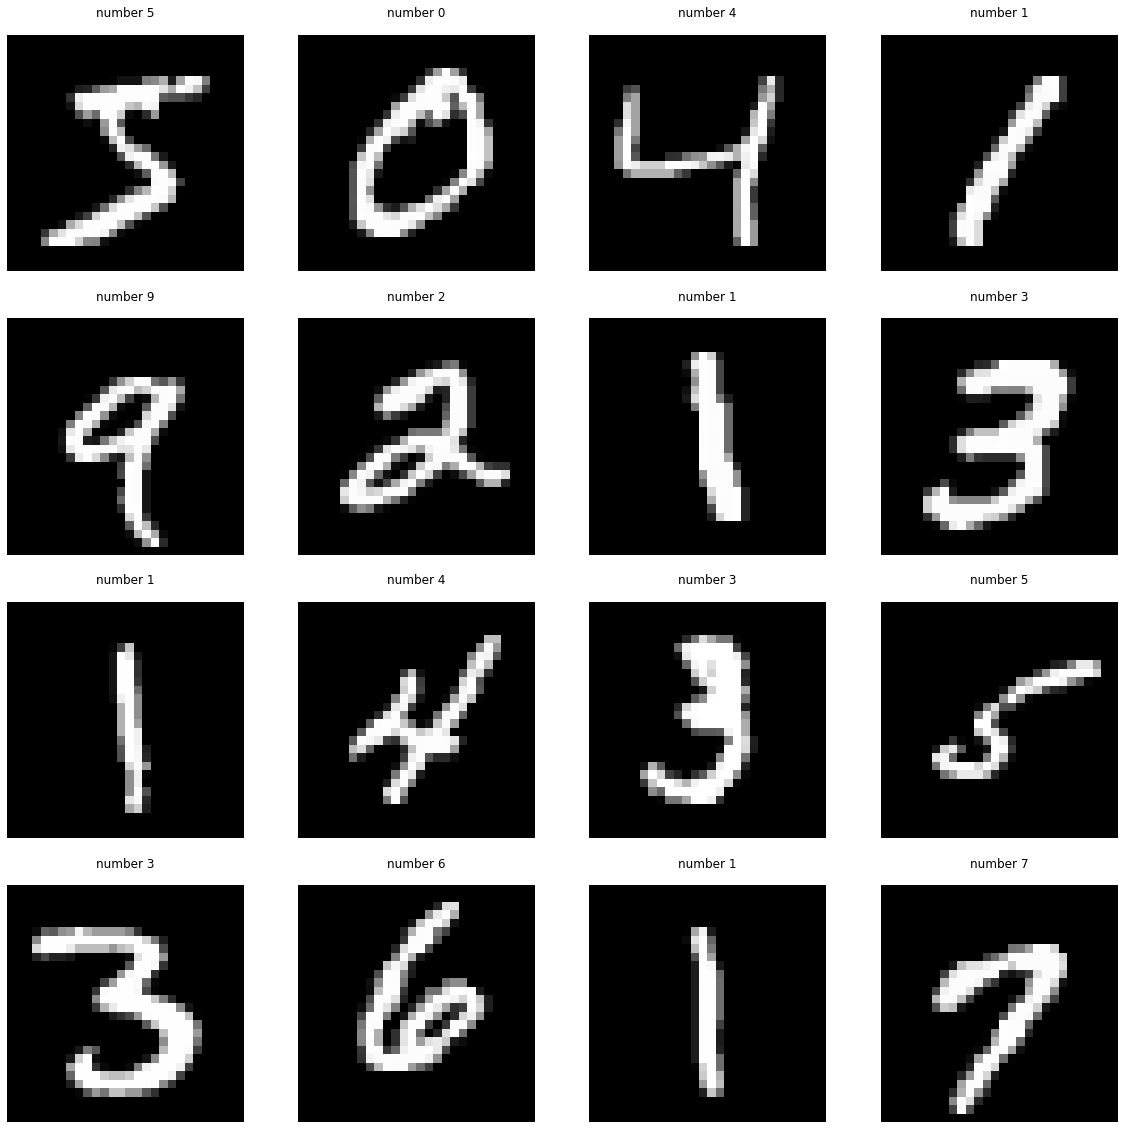

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,axs=plt.subplots(4,4,figsize=(20,20))
plt.gray()
for i,ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('number {}'.format(y_train[i]))
fig.show()

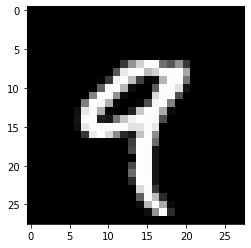

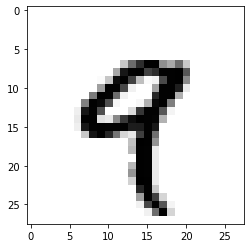

In [12]:
import matplotlib.pyplot as plt
plt.imshow(x_train[4])
plt.show()
plt.imshow(x_train[4],cmap=plt.cm.binary)

In [14]:
print(x_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

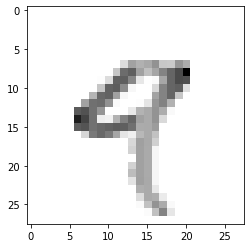

In [16]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[4],cmap=plt.cm.binary)

In [17]:
print(x_train[4])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [18]:
print(y_train[4])

9


In [19]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(x_trainr.shape)
print(x_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [20]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout,Activation,Flatten ,Conv2D,MaxPooling2D
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=x_trainr.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [23]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_8 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_9 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [25]:
print('Toal Training Samples=',len(x_trainr))

Toal Training Samples= 60000


In [26]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 68s 51ms/step - loss: 0.3458 - accuracy: 0.8909 - val_loss: 0.1461 - val_accuracy: 0.9559
Epoch 2/5
1313/1313 [==============================] - 67s 51ms/step - loss: 0.1070 - accuracy: 0.9675 - val_loss: 0.0904 - val_accuracy: 0.9726
Epoch 3/5
1313/1313 [==============================] - 66s 51ms/step - loss: 0.0749 - accuracy: 0.9774 - val_loss: 0.1081 - val_accuracy: 0.9661
Epoch 4/5
1313/1313 [==============================] - 68s 51ms/step - loss: 0.0592 - accuracy: 0.9812 - val_loss: 0.0700 - val_accuracy: 0.9793
Epoch 5/5
1313/1313 [==============================] - 67s 51ms/step - loss: 0.0465 - accuracy: 0.9863 - val_loss: 0.0724 - val_accuracy: 0.9789


In [28]:
test_loss,test_acc=model.evaluate(x_testr,y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.0674 - accuracy: 0.9793
0.06738085299730301
0.9793000221252441


In [29]:
predictions=model.predict([x_testr])

313/313 [==============================] - 4s 13ms/step


In [30]:
print(predictions)

[[6.32940766e-09 1.58717398e-06 1.94096392e-05 ... 9.99971569e-01
  1.43986199e-07 1.17264369e-06]
 [3.42514773e-04 4.41435577e-06 9.99643207e-01 ... 2.20873517e-06
  2.37313907e-06 1.75796629e-07]
 [9.15151122e-06 9.99979556e-01 3.74196179e-06 ... 8.39365839e-07
  2.95917999e-07 1.42764611e-06]
 ...
 [2.07815546e-07 9.18190108e-06 1.42394441e-07 ... 3.11187932e-06
  3.35218061e-07 2.53763264e-05]
 [2.40547324e-05 6.87042145e-10 4.67617042e-07 ... 3.26229451e-06
  3.74826814e-05 3.25276028e-06]
 [7.42464726e-06 1.99729433e-09 1.05707977e-06 ... 2.10503770e-09
  1.71003842e-06 1.43037875e-08]]
